## 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#charts are displayed without needing to be called

%matplotlib inline

In [44]:
#import data sets

path = r'/Users/juliewhitton/Desktop/Personal Project/'
df_inc_complete = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'))
df_inc = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'), usecols = ['n_killed', 
                                                                                                'n_injured', 
                                                                                                'n_guns_involved',
                                                                                                'inc_rate', 'latitude',
                                                                                                'longitude'])

df_inc.head()                          

,n_killed,n_injured,n_guns_involved,latitude,longitude,inc_rate
0,0,0,NaN,43.2301,-86.2514,14.572227
1,0,1,NaN,42.4142,-82.9582,14.572227
2,2,2,NaN,42.3484,-83.0597,14.572227
3,0,2,NaN,42.3756,-83.0643,14.572227
4,0,1,NaN,42.3727,-83.1921,14.572227


In [26]:
df_inc.shape

(225597, 4)

In [28]:
df_inc.isna().sum()

n_killed               0
n_injured              0
n_guns_involved    99264
inc_rate               0
dtype: int64

In [42]:
df_inc['longitude'].describe()

count    219257.000000
mean        -89.294748
std          14.334314
min        -171.429000
25%         -94.091000
50%         -86.228100
75%         -80.014300
max          90.370000
Name: longitude, dtype: float64

In [45]:
df_inc_complete.head()

,incident_id,state,year,n_killed,n_injured,n_guns_involved,latitude,longitude,notes,inc_rate
0,95289,MI,2014,0,0,NaN,43.2301,-86.2514,bullets entered home,14.572227
1,92607,MI,2014,0,1,NaN,42.4142,-82.9582,NaN,14.572227
2,92602,MI,2014,2,2,NaN,42.3484,-83.0597,NaN,14.572227
3,92620,MI,2014,0,2,NaN,42.3756,-83.0643,2 men shot by drunk perp @ party.,14.572227
4,92612,MI,2014,0,1,NaN,42.3727,-83.1921,NaN,14.572227


In [46]:
#drop incident_id and notes from complete set to avoid too much chaos

df_inc_complete.drop(columns = ['incident_id', 'notes'], inplace = True)

## 02. Create a Correlation Matrix and Heatmap

In [38]:
#create correlation matrix

df_inc.corr()

,n_killed,n_injured,n_guns_involved,latitude,longitude,inc_rate
n_killed,1.000000,-0.132884,-0.027894,-0.077842,-0.062432,-0.047307
n_injured,-0.132884,1.000000,-0.038194,-0.007728,0.039018,0.019442
n_guns_involved,-0.027894,-0.038194,1.000000,-0.001539,-0.016978,-0.014733
latitude,-0.077842,-0.007728,-0.001539,1.000000,-0.057802,0.029585
longitude,-0.062432,0.039018,-0.016978,-0.057802,1.000000,0.200424
inc_rate,-0.047307,0.019442,-0.014733,0.029585,0.200424,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

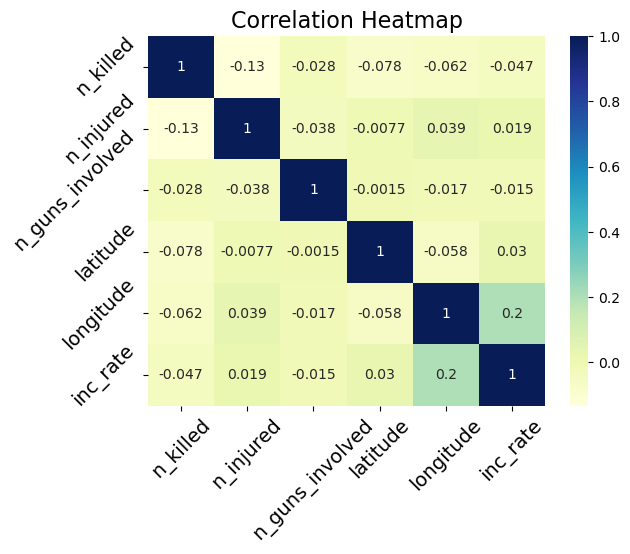

In [39]:
#create heatmap

inc_heatmap = sns.heatmap(df_inc.corr(),  cmap = 'YlGnBu', annot = True)

#edit labels and create title

plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14, rotation = 45)
plt.title('Correlation Heatmap', fontsize = 16)


Discuss Findings:
There is almost no correlation between these variables. The highest coefficient is 0.2 between longitude and 
incident rate.

## 03. Create Scatterplots

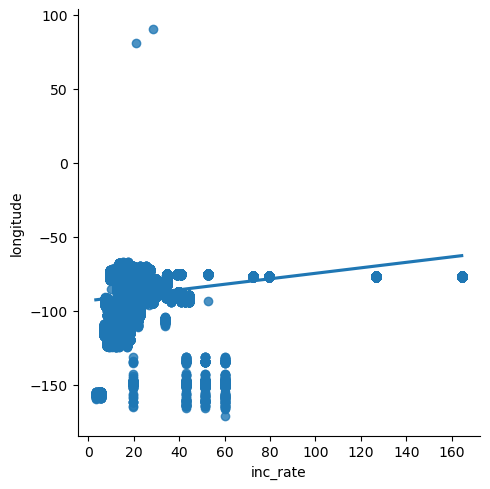

In [40]:
#scatterplot of inc_rate and n_killed

sns.lmplot(x = 'inc_rate', y = 'longitude', data = df_inc)

Discuss the output:
There are a few outliers indicating that the parts of the US with the highest incident rates are farther east. It is difficult to glean further insight with this data because of the structure of the dataset. The lat/long coordinates are given for each unique incident while the incident rate has been calculated by state and count of incidents that occurred in that state.   

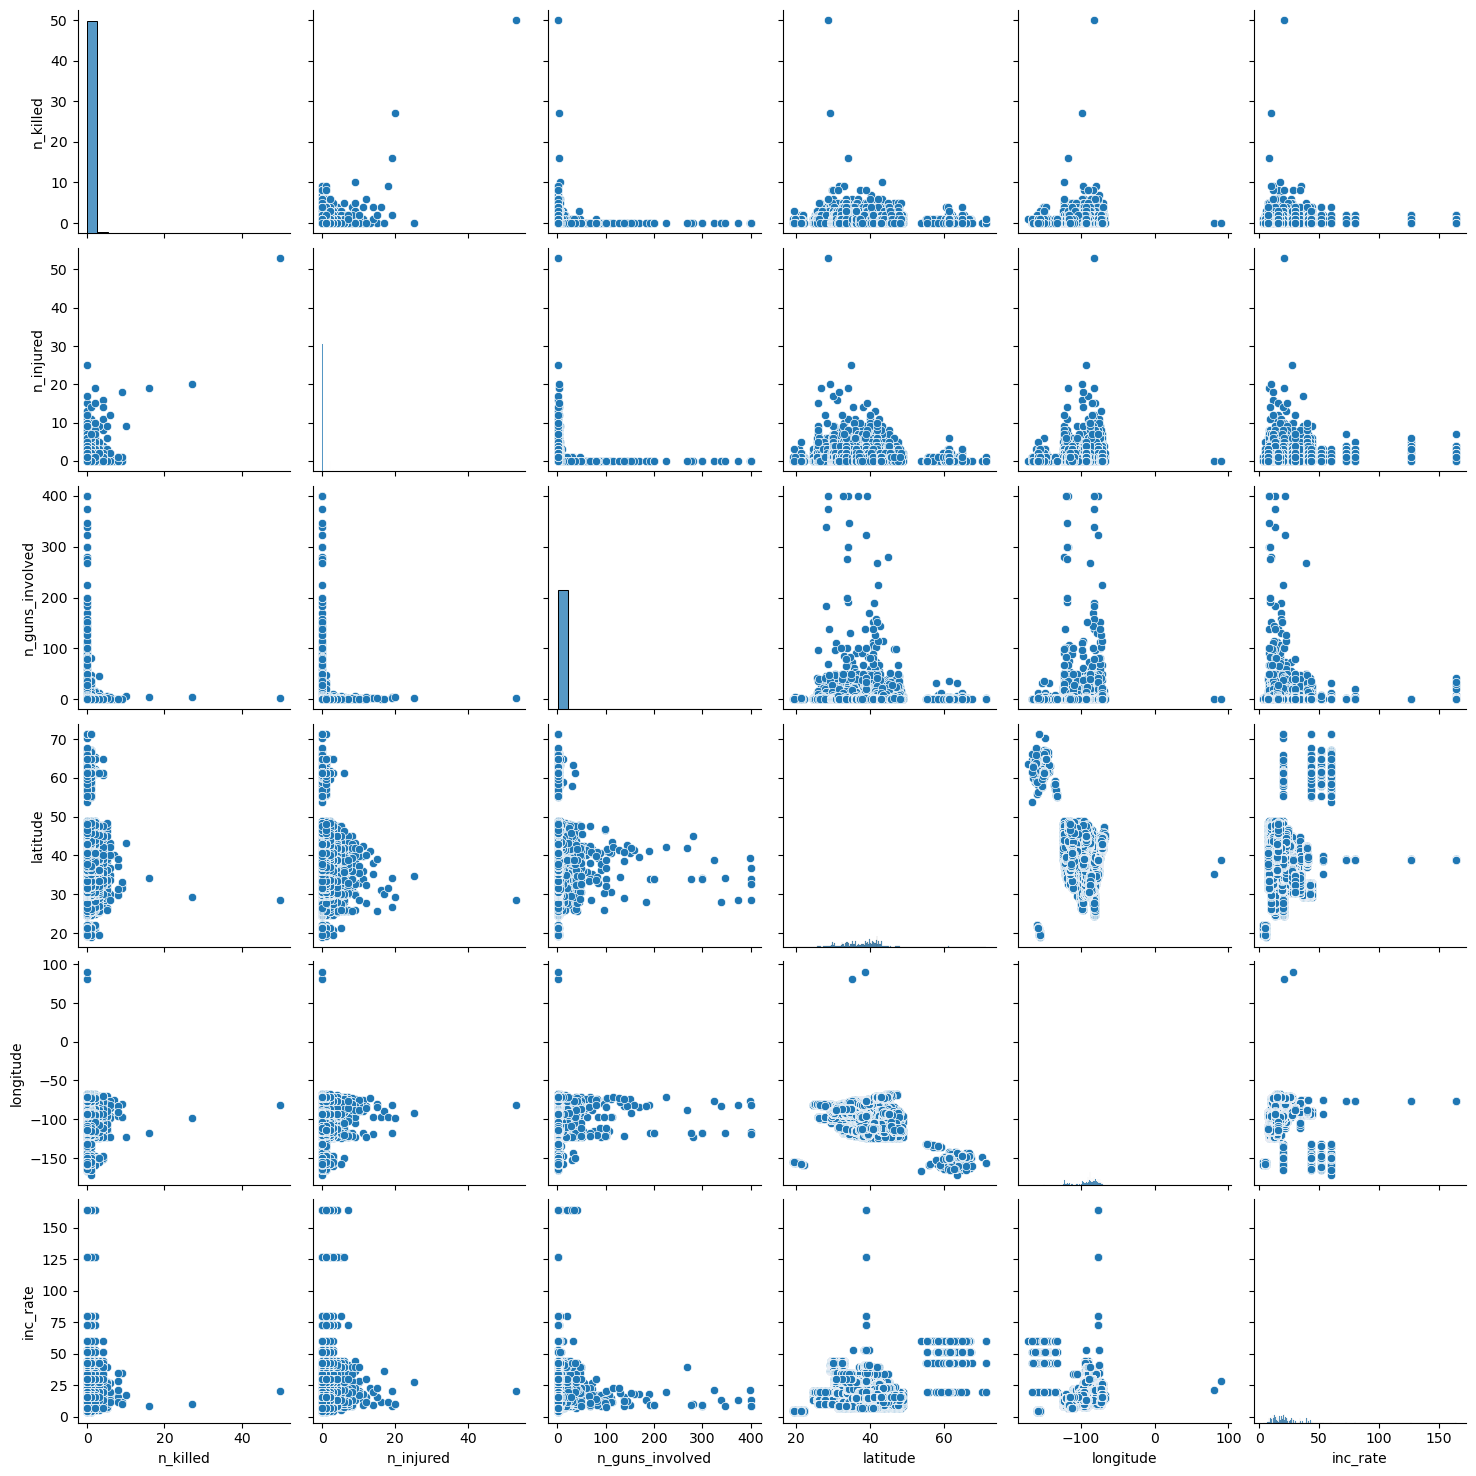

In [43]:
#create pair plot

pairplot = sns.pairplot(df_inc)

Discuss Output:
There appears to be a slight influence by latitude on the number of guns involved in an incident. The approximate latitude for the highest number of guns involved includes cities such as: NYC, Detroit, and Chicago. Again, due to the structure of this dataset it is difficult to glean any meaningful insights.

## 04. Create Categorical Plot

<AxesSubplot:xlabel='inc_rate', ylabel='Count'>

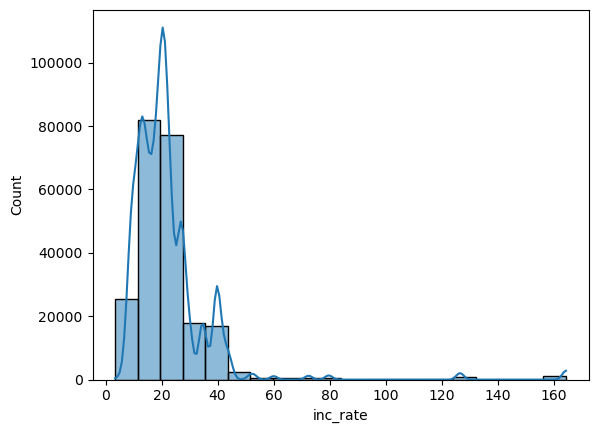

In [47]:
#create categories for incident rates

sns.histplot(df_inc_complete['inc_rate'], bins = 20, kde = True)


In [51]:
df_inc_complete['inc_category'].astype('str')

0         Low Rate
1         Low Rate
2         Low Rate
3         Low Rate
4         Low Rate
            ...   
225592    Low Rate
225593    Low Rate
225594    Low Rate
225595    Low Rate
225596    Low Rate
Name: inc_category, Length: 225597, dtype: object

In [48]:
#add inc_rate cat col

df_inc_complete.loc[df_inc_complete['inc_rate'] < 20, 'inc_category'] = 'Low Rate'
df_inc_complete.loc[(df_inc_complete['inc_rate'] >= 20) & (df_inc_complete['inc_rate'] < 40), 
                    'inc_category'] = 'Medium Rate'
df_inc_complete.loc[df_inc_complete['inc_rate'] >= 40, 'inc_category'] = 'High Rate'

df_inc_complete['inc_category'].value_counts()

Low Rate       116824
Medium Rate     97771
High Rate       11002
Name: inc_category, dtype: int64

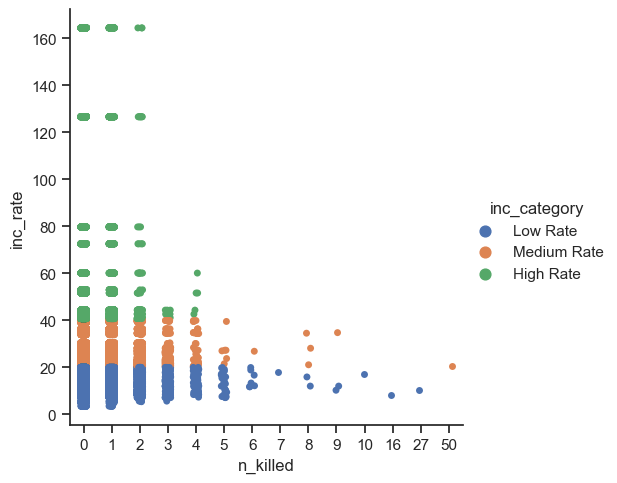

In [53]:
#create cat plot between inc_category and longitude

sns.set(style = 'ticks')
catplot = sns.catplot(x ='n_killed', y = 'inc_rate', hue = 'inc_category', data = df_inc_complete)

Discuss Findings:
I tried to create the plot using longitude for the x-axis but the plot did not generate even after waiting for 30 minutes. I changed the x-axis to be the number of individuals killed and this actually provides an interesting observation. The incidents with the most number of individuals killed primarily occurred in locations with a low rate of incidents with several also occurring in locations with a medium rate of incidents. This may be due to isolated mass shootings. It requires further investigation. 

I don't yet have any answers to my previously stated questions. New questions I have are: What incidents occurred in low/med rate locations to account for the large number of individuals killed? What kind of weapon(s), if known, were used and what were the gun laws in place at the time? Were there multiple offenders involved? 

Hypothesis: The incidents in which a large number of individuals were killed were mass shooting incidents. Some type of automatic weapon was used and there was not an automatic weapon ban in place in those locales. 